In [1]:
import os
import pandas as pd
from preprocess import get_preprocessed_dataset


In [2]:
balanced_df, y_resampled = get_preprocessed_dataset()

print(y_resampled)
balanced_df.head()

0         Crime
1         Crime
2         Crime
3         Crime
4         Crime
         ...   
8995    Science
8996    Science
8997    Science
8998    Science
8999    Science
Name: Category, Length: 9000, dtype: object


aaron  abandon  abide  ability      able  abolish  abort  abortion  \
0      0        0      0        0  0.014819        0      0         0   
1      0        0      0        0         0        0      0         0   
2      0        0      0        0         0        0      0         0   
3      0        0      0        0         0        0      0         0   
4      0        0      0        0         0        0      0         0   

   abortions  abroad  ...  yuma  zealand      zero  zeus  zinaida  zionism  \
0          0       0  ...     0        0         0     0        0        0   
1          0       0  ...     0        0         0     0        0        0   
2          0       0  ...     0        0         0     0        0        0   
3          0       0  ...     0        0         0     0        0        0   
4          0       0  ...     0        0  0.034342     0        0        0   

   zionist  zionists  zone  zoology  
0        0         0     0        0  
1        0         0     0        0  
2        0         0     0        0  
3        0         0     0        0  
4        0         0     0        0  

[5 rows x 5000 columns]

In [3]:
# ... existing imports ...
from sklearn.model_selection import train_test_split

# After loading the balanced dataset
balanced_df, y_resampled = get_preprocessed_dataset()

# Split the data - X will be your features (balanced_df) and y will be your target (y_resampled)
X_train, X_test, y_train, y_test = train_test_split(
    balanced_df, 
    y_resampled,
    test_size=0.2,  # 80% training, 20% testing
    random_state=42  # For reproducibility
)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (7200, 5000)
Testing set shape: (1800, 5000)


In [4]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import numpy as np

# Codificar las etiquetas como números
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(f"y_train shape: {y_train.shape}")  # Debe tener (7200, num_classes)
print(f"y_test shape: {y_test.shape}")    # Debe tener (1800, num_classes)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

y_train shape: (7200, 4)
y_test shape: (1800, 4)


In [5]:
#Librerias para los modelos
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, SimpleRNN
from keras.layers import Embedding
from keras.layers import Flatten
from keras.preprocessing import sequence
from keras.layers import Conv2D
from keras.layers import MaxPooling1D
import numpy as np

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Flatten, Dense
from keras.layers import Dropout
from tensorflow.keras.regularizers import l1  # Add this import


num_classes = len(label_encoder.classes_)  # Número de clases únicas
embedding_dim = 32

vocabulary_size = X_train.shape[1]

model = Sequential()
model.add(Flatten(input_shape=(vocabulary_size,)))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='sigmoid'))

model.compile(optimizer=SGD(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

c:\github\Semestre_X\NLP\EmailCategorizer\venv\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 5000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     2,560,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,692,868 (10.27 MB)

 Trainable params: 2,692,868 (10.27 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/150
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.2620 - loss: 1.3833 - val_accuracy: 0.2861 - val_loss: 1.3795
Epoch 2/150
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2739 - loss: 1.3807 - val_accuracy: 0.3139 - val_loss: 1.3766
Epoch 3/150
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2846 - loss: 1.3780 - val_accuracy: 0.3267 - val_loss: 1.3745
Epoch 4/150
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2927 - loss: 1.3765 - val_accuracy: 0.3467 - val_loss: 1.3731
Epoch 5/150
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3110 - loss: 1.3739 - val_accuracy: 0.3683 - val_loss: 1.3720
Epoch 6/150
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3153 - loss: 1.3730 - val_accuracy: 0.3756 - val_loss: 1.3708
Epoch 7/150
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3198 - loss: 1.3721 - val_accuracy: 0.3906 - val_loss: 1.3693
Epoch 8/150
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3263 - loss: 1.3713 - val_accu

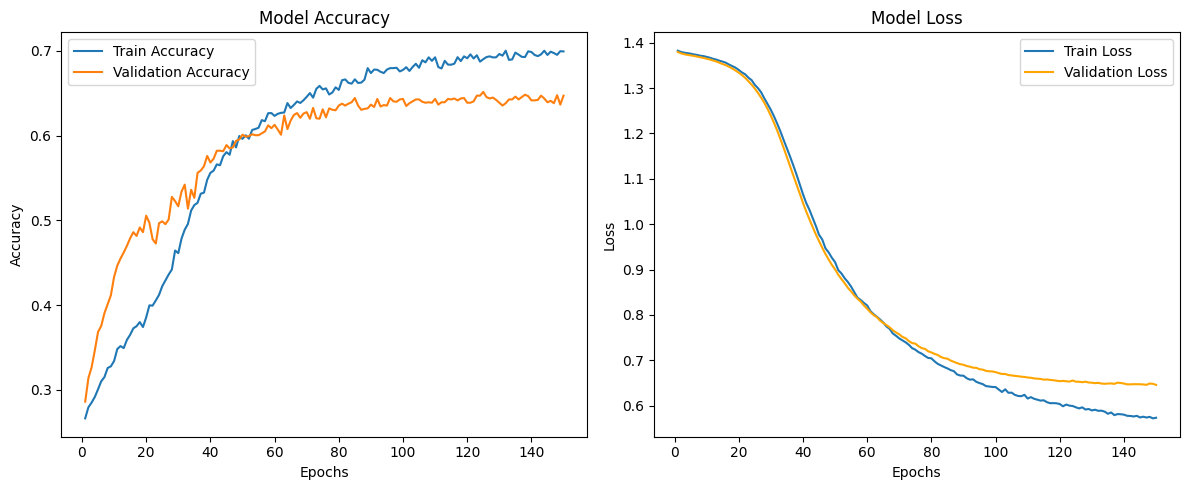

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


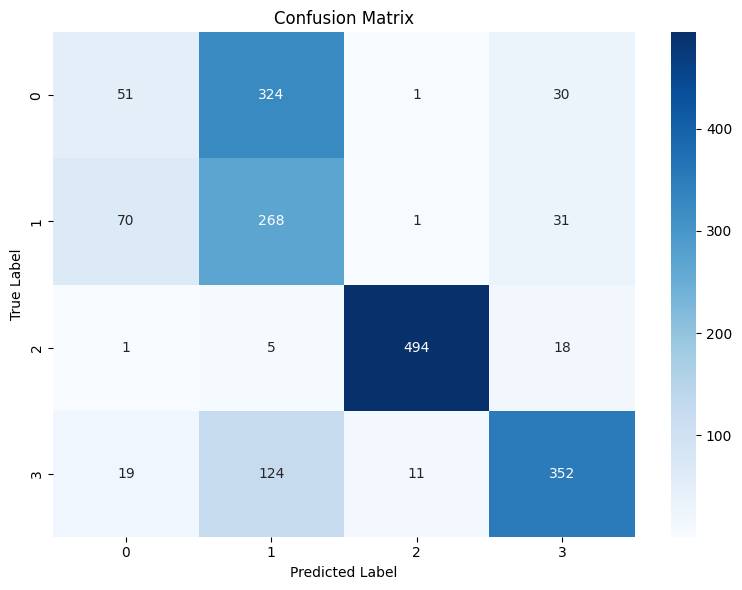

In [7]:
from model_utils import plot_history, plot_confusion_matrix
# Entrenar el modelo
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=150, batch_size=64)
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')
plot_history(history)

# Get predictions
y_pred = model.predict(X_test)
y_true = y_test

# If your model outputs probabilities (common in classification tasks)
# and you want class labels instead, you can use:
y_pred = np.argmax(y_pred, axis=1)

# If your y_test is one-hot encoded, convert it to class labels
if len(y_test.shape) > 1:  # if one-hot encoded
    y_true = np.argmax(y_test, axis=1)

# Now you can plot the confusion matrix
plot_confusion_matrix(y_true, y_pred)

In [11]:
model.save('./models/w2v_nn.keras')

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from keras.layers import Dropout
from keras.layers import Embedding, Conv2D, MaxPooling2D, Flatten, Dense
from keras.layers import Reshape


num_classes = len(label_encoder.classes_)  # Número de clases únicas
embedding_dim = 32
kernel_shape = (3, embedding_dim)

vocabulary_size = X_train.shape[1]

model = Sequential()
model.add(Embedding(input_dim=vocabulary_size, output_dim=embedding_dim, input_length=vocabulary_size))  # Capa de embedding
model.add(Reshape((vocabulary_size, embedding_dim, 1)))  # Redimensionar para que sea compatible con Conv2D

model.add(Conv2D(filters=128, kernel_size=kernel_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(vocabulary_size - 3 + 1, 1)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))  # Capa oculta
model.add(Dense(1, activation='sigmoid'))  # Capa de salida para clasificación binaria
model.add(Dense(num_classes, activation='sigmoid'))  # Capa de salida con una neurona y activación Sigmoid (para clasificación binaria)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

c:\github\Semestre_X\NLP\EmailCategorizer\venv\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 82s 729ms/step - accuracy: 0.2228 - loss: 0.7066 - val_accuracy: 0.2256 - val_loss: 0.6681
Epoch 2/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 77s 679ms/step - accuracy: 0.2493 - loss: 0.6626 - val_accuracy: 0.2878 - val_loss: 0.6469
Epoch 3/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 76s 671ms/step - accuracy: 0.2617 - loss: 0.6423 - val_accuracy: 0.2878 - val_loss: 0.6291
Epoch 4/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 74s 658ms/step - accuracy: 0.2838 - loss: 0.6254 - val_accuracy: 0.2878 - val_loss: 0.6145
Epoch 5/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 76s 673ms/step - accuracy: 0.2715 - loss: 0.6116 - val_accuracy: 0.2878 - val_loss: 0.6026
Epoch 6/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 75s 665ms/step - accuracy: 0.2749 - loss: 0.6003 - val_accuracy: 0.2878 - val_loss: 0.5931
Epoch 7/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 76s 675ms/step - accuracy: 0.2791 - loss: 0.5912 - val_accuracy: 0.2878 - val_loss: 0.5854
Epoch 8/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 75s 665ms/step - accuracy: 0.2717 - loss: 0

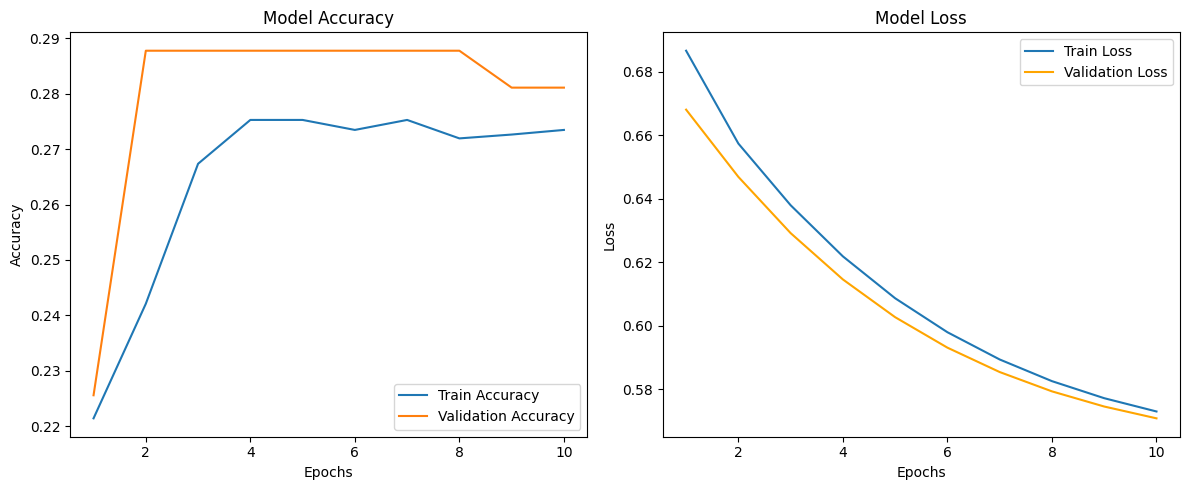

57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step


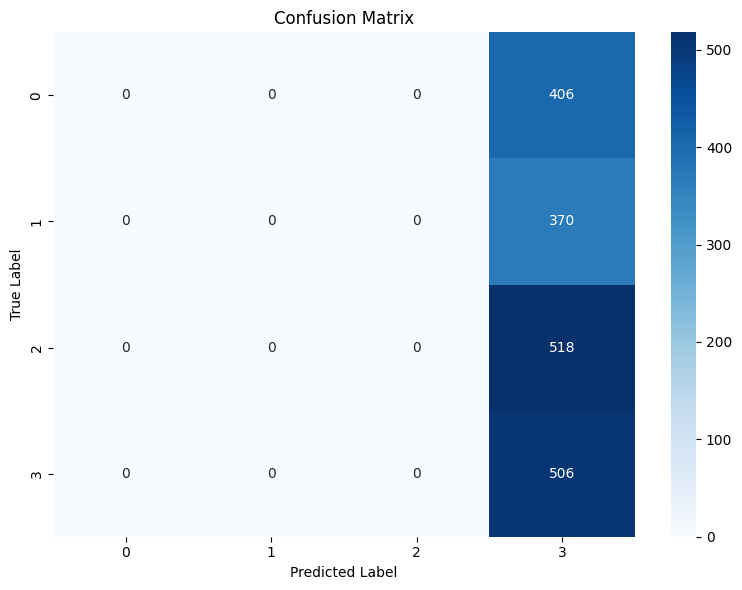

In [14]:

# Entrenar el modelo
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64)
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')
plot_history(history)

# Get predictions
y_pred = model.predict(X_test)
y_true = y_test

# If your model outputs probabilities (common in classification tasks)
# and you want class labels instead, you can use:
y_pred = np.argmax(y_pred, axis=1)

# If your y_test is one-hot encoded, convert it to class labels
if len(y_test.shape) > 1:  # if one-hot encoded
    y_true = np.argmax(y_test, axis=1)

# Now you can plot the confusion matrix
plot_confusion_matrix(y_true, y_pred)

In [16]:
model.save('./models/w2v_Emb_nn.keras')